In [1]:
import json
import matplotlib.pyplot as plt

# 🔁 CHANGE THIS to your actual log path
log_path = "/data/sundeep/CS536-Confidence_guided_xray/Point-Beyond-Class/out_cxr_teacher_20p/log.txt"

In [2]:
epochs = []
ap = []       # AP@[0.50:0.95]
ap50 = []     # AP@0.50
ap75 = []     # AP@0.75
ar100 = []    # AR@100

with open(log_path, "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Only parse JSON lines
        if not line.startswith("{"):
            continue
        
        try:
            record = json.loads(line)
        except json.JSONDecodeError:
            continue
        
        if "test_coco_eval_bbox" not in record:
            continue
        
        metrics = record["test_coco_eval_bbox"]
        # mapping:
        # 0: AP, 1: AP50, 2: AP75, 8: AR@100
        epochs.append(record.get("epoch", len(epochs)))
        ap.append(metrics[0])
        ap50.append(metrics[1])
        ap75.append(metrics[2])
        ar100.append(metrics[8])

len(epochs), epochs[:5], ap[:5], ap50[:5]

(22,
 [4, 9, 14, 19, 24],
 [0.008112802309686917,
  0.013664986278334,
  0.016530383318686927,
  0.0159476351656033,
  0.01735063748583169],
 [0.04583227731878548,
  0.08189452998823976,
  0.08696175565804706,
  0.0864579670159807,
  0.08976080323069477])

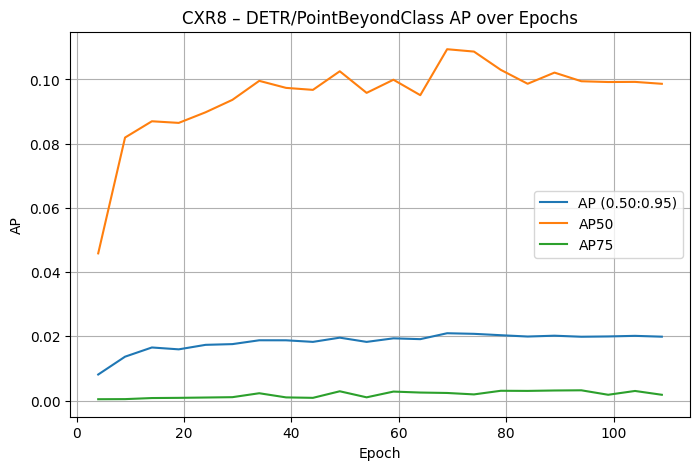

In [3]:
plt.figure(figsize=(8,5))
plt.plot(epochs, ap, label="AP (0.50:0.95)")
plt.plot(epochs, ap50, label="AP50")
plt.plot(epochs, ap75, label="AP75")

plt.xlabel("Epoch")
plt.ylabel("AP")
plt.title("CXR8 – DETR/PointBeyondClass AP over Epochs")
plt.legend()
plt.grid(True)
plt.show()

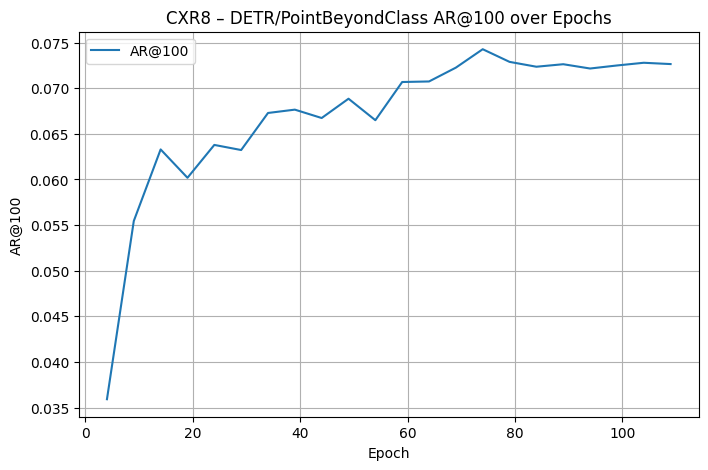

In [4]:
plt.figure(figsize=(8,5))
plt.plot(epochs, ar100, label="AR@100")

plt.xlabel("Epoch")
plt.ylabel("AR@100")
plt.title("CXR8 – DETR/PointBeyondClass AR@100 over Epochs")
plt.legend()
plt.grid(True)
plt.show()